# 尤度について
(https://qiita.com/kenmatsu4/items/b28d1b3b3d291d0cc698)

## 正規分布図
平均10, 標準偏差3  
縦軸は確率密度 $f(x)$ となってる。

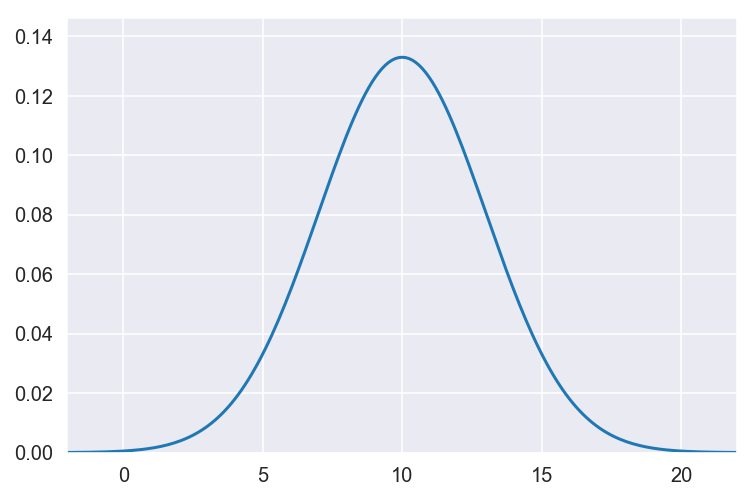

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.cm as cm
import numpy.random as rd

mean = 10
std = 3

min_x = mean - 4 * std
max_x = mean + 4 * std

x = np.linspace(min_x, max_x, 201)
y = (1 / np.sqrt(2 * np.pi * std ** 2)) * np.exp(-0.5 * (x - mean) ** 2 / std ** 2)

plt.figure()
plt.xlim(min_x, max_x)
plt.ylim(0, max(y) * 1.1)
plt.plot(x, y)
plt.show()

尤度関数の概念は、「サンプリングしてデータが観測された後、そのデータは元々どういうパラメータを持つ確率分布から生まれたものだったか？」という問いに答えるためのもの。  
尤度はベイズの定理を構成する1要素となっている。  
<br/>
ここで、標本が10個手に入り、$x = (x_1, x_2, ..., x_{10})$、それが正規分布に従うが、平均と標準偏差の2つのパラメータが不明であるとする。

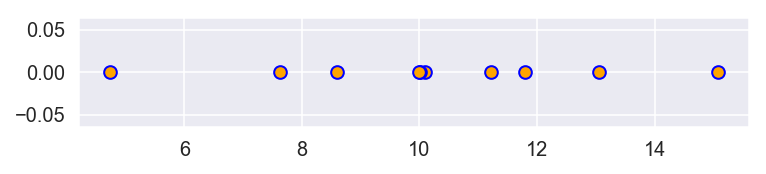

In [2]:
plt.figure(figsize=(6, 1))
rd.seed(7)
data = rd.normal(10, 3, 10,)
plt.scatter(data, np.zeros_like(data), c='orange', s=40,
            edgecolors='blue')
plt.show()

10個の標本がこの値になった同時分布を考える。また、この10個の標本は **iid** (独立同一分布:同じ分布から独立に取られた標本）であると仮定する。独立なので、それぞれの確率密度の積として表せるので、
<br/>
$$
    P(x_1,x_2,...,x_{10}) = P(x_1)P(x_2)...P(x_{10})
$$
<br/>
となる。ここで、$P(x_i)$ は全て正規分布としていたので、
<br/>
$$
    P(x_1,x_2,...,x_{10}) = f(x_1)f(x_2)...f(x_{10})
$$
としてもよい。

対数尤度が低くなるときをみる

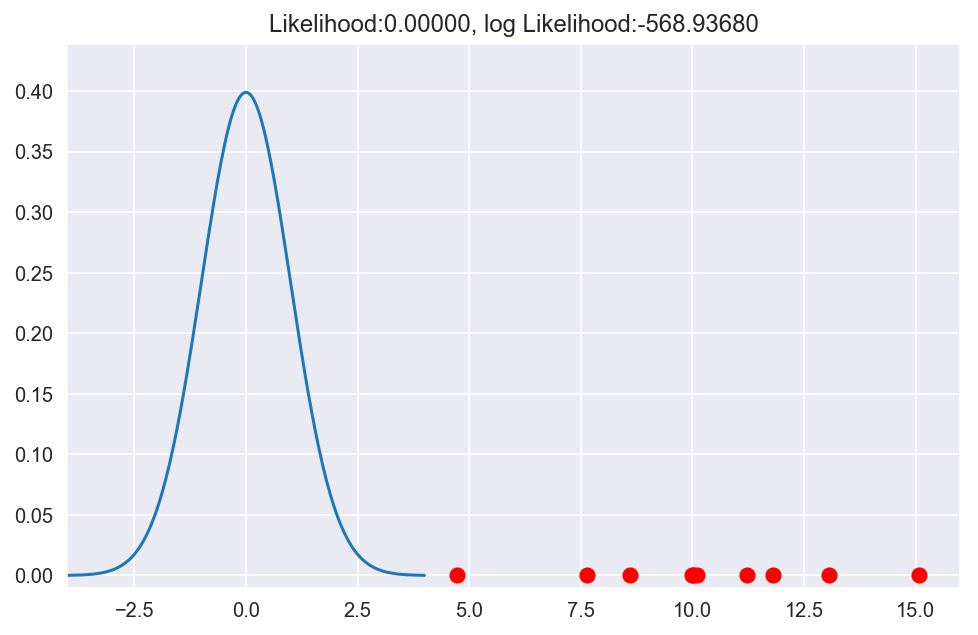

In [4]:
m = 0
s = 1


min_x = m-4*s
max_x = m+4*s

def norm_dens(val):
    return (1/np.sqrt(2*np.pi*s**2))*np.exp(-0.5*(val-m)**2/s**2)

x = np.linspace(min_x, max_x, 201)
y = norm_dens(x)

L = np.prod([norm_dens(x_i) for x_i in data])
l = np.log(L)

plt.figure(figsize=(8,5))
plt.xlim(min_x, 16)
plt.ylim(-0.01,max(y)*1.1)

# 正規分布の密度関数の描画
plt.plot(x,y)

# データ点の描画
plt.scatter(data, np.zeros_like(data), c="r", s=50)
for d in data:
    plt.plot([d, d], [0, norm_dens(d)], "k--", lw=1)

plt.title("Likelihood:{0:.5f}, log Likelihood:{1:.5f}".format(L, l))

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Text(0.5, 0, 's')

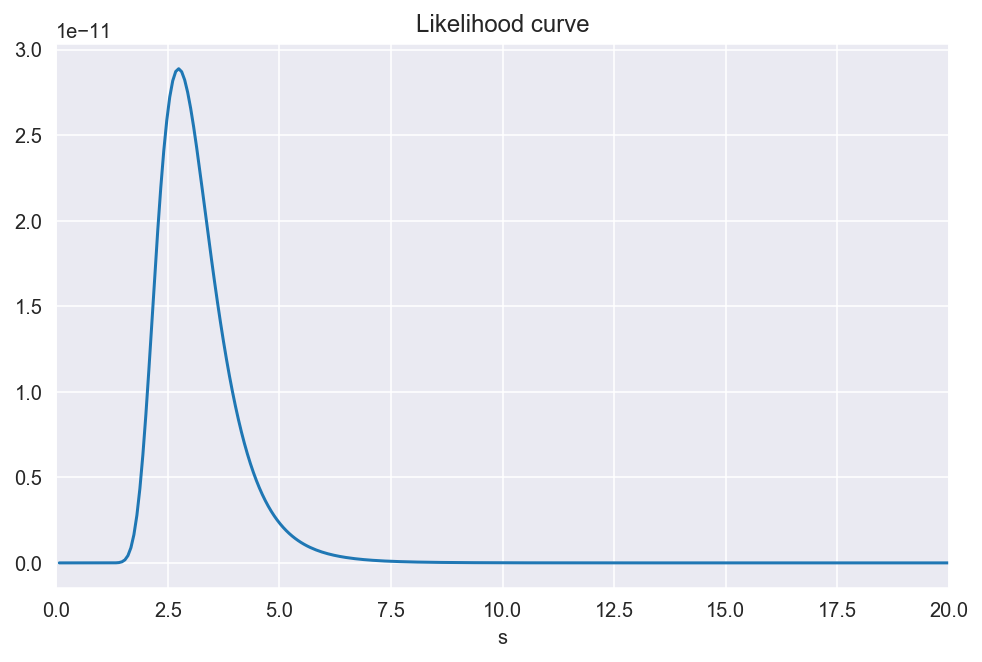

In [9]:
# sを変化させる

list_L = []
m = 10

ss = np.linspace(0, 20,300)
for s in ss:
    list_L.append(np.prod([norm_dens(x_i, m, s) for x_i in data]))

plt.figure(figsize=(8,5))
plt.xlim(min(ss), max(ss))
plt.plot(ss, (list_L))
plt.title("Likelihood curve")
plt.xlabel("s")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Text(0, 0.5, 's')

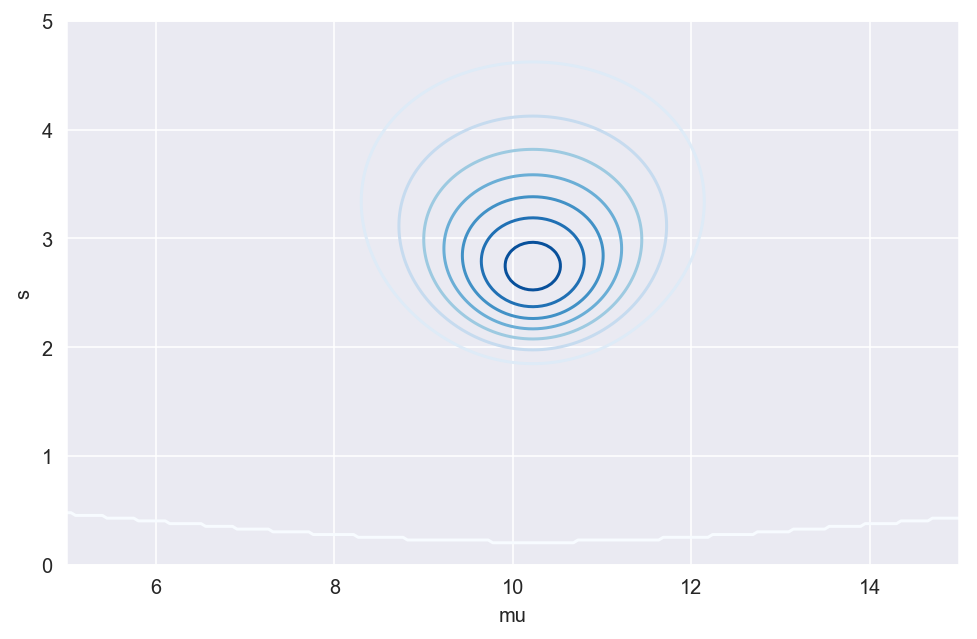

In [10]:
# 等高線

plt.figure(figsize=(8,5))
mu = np.linspace(5, 15, 200)
s = np.linspace(0, 5, 200)
MU, S = np.meshgrid(mu, s)

Z = np.array([(np.prod([norm_dens(x_i, a, b) for x_i in data])) for a, b in zip(MU.flatten(), S.flatten())])
plt.contour(MU, S, Z.reshape(MU.shape), cmap=cm.Blues)
plt.xlabel("mu")
plt.ylabel("s")